# Simple optimization example (finding the solution by iteration)

The waiting times and the number of operators are each assigned a cost. The search is for the number of operators for which the costs become minimal.

## Importing modules

In [1]:
# Processing results arrays
import numpy as np

# Simulator
from queuesim.tools import SimProcess, run_parallel

# Station types
from queuesim.models import mmc_model

# Plot model
import matplotlib.pyplot as plt

# Defining general plot style
plt.style.use('seaborn-v0_8')

## Model parameters

In [2]:
# Arrivals to be simulated
count = 100_000

# Arrival process
mean_I = 50

# Service process
mean_S = 600

# Costs
cost_waiting = 10  # Costs per waiting second
cost_c = 120  # Costs per operator

## Definition of the $x$ range (=number of operators)

In [3]:
c_range = range(14, 25)

## Parallel simulation of the models

In [4]:
models, simulators = run_parallel([SimProcess(mmc_model(mean_I, mean_S, c, count)) for c in c_range])

11 parallel processes started.
All processes terminated, runtime: 11.7 seconds.
Results have been collected.


## Processing results

In [5]:
waiting_times = np.array([model['Dispose'].statistic_client_waiting.mean for model in models])
costs = waiting_times * cost_waiting + np.array(c_range) * cost_c

## Output of results

In [6]:
# Optional: Interactive diagram mode
# Run "pip install ipympl" first
# %matplotlib ipympl

[Text(0.5, 1.0, 'Costs as a function of the number of operators'),
 Text(0.5, 0, 'Number of operators $c$'),
 Text(0, 0.5, 'Costs')]

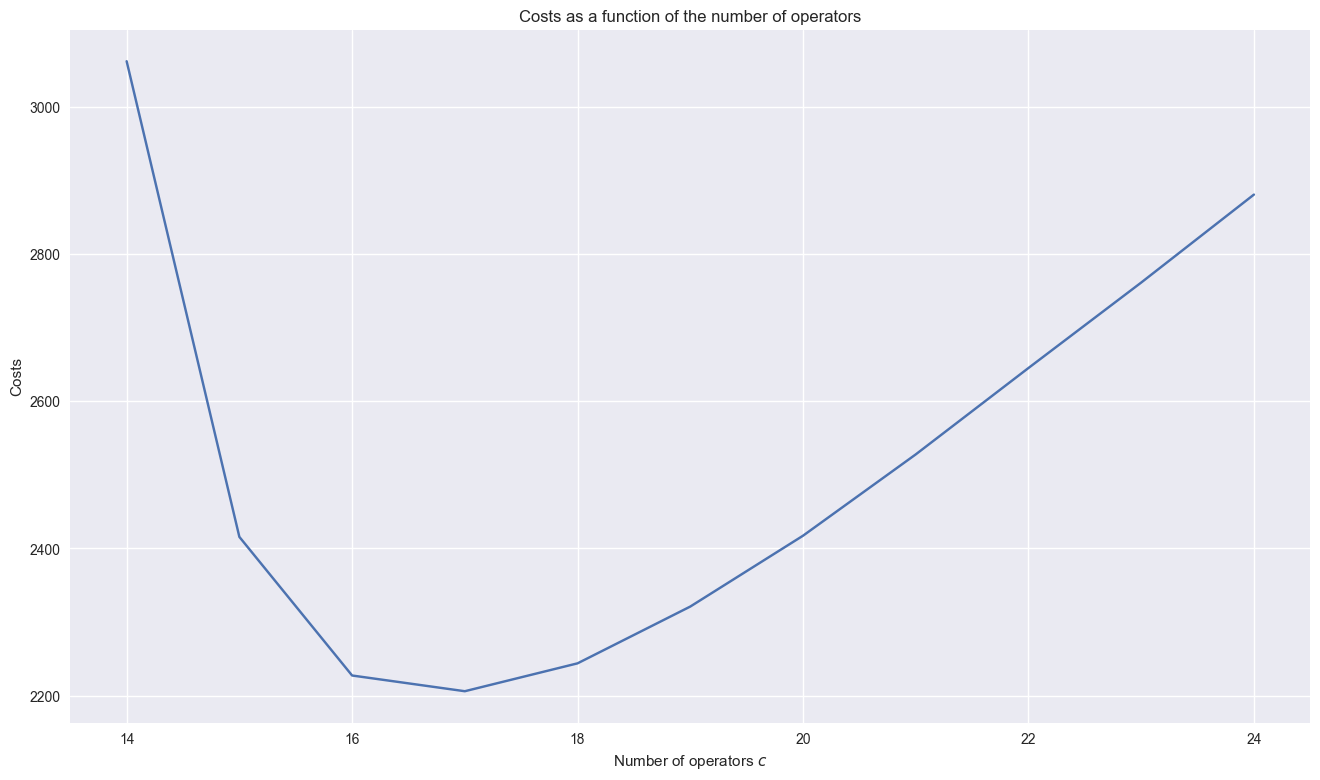

In [7]:
_, ax = plt.subplots(figsize=(16, 9))
ax.plot(c_range, costs)
ax.set(title="Costs as a function of the number of operators", xlabel="Number of operators $c$", ylabel="Costs")

In [8]:
print("Cost-optimal number of operators:", c_range[np.argmin(costs)])
print("Analyzed range:", c_range[0], "...", c_range[-1])

Cost-optimal number of operators: 17
Analyzed range: 14 ... 24
